In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("student_info.csv")
print(df)

     Student_ID     Name Department  Marks_Math  Marks_English  Marks_Science  \
0          1001   Ganesh        CSE        72.0           87.0           59.0   
1          1002    Divya        EEE        79.0           40.0           48.0   
2          1003  Karthik        CSE        78.0           69.0           46.0   
3          1004     Hema        EEE        57.0           94.0           92.0   
4          1005   Ekansh        ECE        79.0           75.0           48.0   
..          ...      ...        ...         ...            ...            ...   
115        1116  Karthik       MECH        83.0           50.0           82.0   
116        1117   Ekansh       MECH         NaN           47.0           52.0   
117        1118    Jothi        EEE        69.0           84.0           45.0   
118        1119   Ganesh        EEE        68.0            NaN           86.0   
119        1120    Jothi        CSE        85.0           76.0           68.0   

     Attendance  
0        

In [7]:
df.isnull()


,Student_ID,Name,Department,Marks_Math,Marks_English,Marks_Science,Attendance
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
115,False,False,False,False,False,False,False
116,False,False,False,True,False,False,False
117,False,False,False,False,False,False,False
118,False,False,False,False,True,False,False


In [29]:
#total missing values per column
df.isnull().sum()


Student_ID        0
Name              0
Department        0
Marks_Math       12
Marks_English    12
Marks_Science    12
Attendance        0
dtype: int64

In [30]:
# Remove rows where more than 2 columns have null values
df = df[df.isnull().sum(axis=1) <= 2]


In [31]:
df["Marks_Math"] = df["Marks_Math"].fillna(df["Marks_Math"].mean())
df["Marks_English"] = df["Marks_English"].fillna(df["Marks_English"].median())
df["Marks_Science"] = df["Marks_Science"].fillna(df["Marks_Science"].mode()[0])
df

,Student_ID,Name,Department,Marks_Math,Marks_English,Marks_Science,Attendance
0,1001,Ganesh,CSE,72.000000,87.0,59.0,94.0
1,1002,Divya,EEE,79.000000,40.0,48.0,91.0
2,1003,Karthik,CSE,78.000000,69.0,46.0,88.0
3,1004,Hema,EEE,57.000000,94.0,92.0,63.0
4,1005,Ekansh,ECE,79.000000,75.0,48.0,80.0
...,...,...,...,...,...,...,...
115,1116,Karthik,MECH,83.000000,50.0,82.0,77.0
116,1117,Ekansh,MECH,70.962963,47.0,52.0,86.0
117,1118,Jothi,EEE,69.000000,84.0,45.0,90.0
118,1119,Ganesh,EEE,68.000000,69.0,86.0,85.0


In [32]:
print(df.loc[df.index[df["Marks_Math"] == df["Marks_Math"].mean()]])
print(df.loc[df.index[df["Marks_English"] == df["Marks_English"].median()]])
print(df.loc[df.index[df["Marks_Science"] == df["Marks_Science"].mode()[0]]])



     Student_ID     Name Department  Marks_Math  Marks_English  Marks_Science  \
6          1007    Jothi      CIVIL   70.962963           58.0           41.0   
8          1009   Ganesh        EEE   70.962963           83.0           52.0   
15         1016     Hema        CSE   70.962963           86.0           41.0   
35         1036    Jothi       MECH   70.962963           57.0           68.0   
37         1038    Latha        EEE   70.962963           61.0           52.0   
40         1041   Ganesh      CIVIL   70.962963           60.0           41.0   
77         1078    Farah       MECH   70.962963           66.0           41.0   
89         1090   Ekansh        CSE   70.962963           76.0           41.0   
101        1102   Ganesh        ECE   70.962963           78.0           88.0   
107        1108     Hema      CIVIL   70.962963           66.0           38.0   
109        1110  Charles        EEE   70.962963           69.0           81.0   
116        1117   Ekansh    

In [33]:
df["Total_Marks"] = (df["Marks_Math"] + df["Marks_English"] + df["Marks_Science"])
df["Total_Marks"]


0      218.000000
1      167.000000
2      193.000000
3      243.000000
4      202.000000
          ...    
115    215.000000
116    169.962963
117    198.000000
118    223.000000
119    229.000000
Name: Total_Marks, Length: 120, dtype: float64

In [35]:
df["Performance_Level"] = pd.cut(df["Total_Marks"],bins=[0, 150, 200, 240],labels=["Low", "Medium", "High"],include_lowest=True)


In [31]:
df["Performance_Level"]= pd.cut(
    df["Total_Marks"],
    bins=[-1, 179, 239, float("inf")],
    labels=["Low", "Medium", "High"]
)
df["Performance_Level"]


0      Medium
1         Low
2      Medium
3        High
4      Medium
        ...  
115    Medium
116       Low
117    Medium
118    Medium
119    Medium
Name: Performance_Level, Length: 120, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [43]:
top5 = df.groupby("Department") 
top5

In [44]:
top5 = df.groupby("Department").apply(lambda x: x.nlargest(5, "Total_Marks"))
top5

C:\Users\XNovaQ.17\AppData\Local\Temp\ipykernel_4640\3931010240.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5 = df.groupby("Department").apply(lambda x: x.nlargest(5, "Total_Marks"))


Student_ID     Name Department  Marks_Math  Marks_English  \
Department                                                                  
CIVIL      23         1024  Bhuvana      CIVIL   99.000000           76.0   
           32         1033     Arun      CIVIL   98.000000           66.0   
           58         1059   Ekansh      CIVIL   74.000000           94.0   
           99         1100     Arun      CIVIL   66.000000           94.0   
           92         1093     Hema      CIVIL   77.000000           88.0   
CSE        62         1063    Latha        CSE   85.000000           70.0   
           88         1089     Hema        CSE   94.000000           86.0   
           59         1060  Bhuvana        CSE   64.000000           92.0   
           119        1120    Jothi        CSE   85.000000           76.0   
           19         1020  Bhuvana        CSE   65.000000           67.0   
ECE        94         1095   Ishaan        ECE   84.000000           94.0   
           21         1022    Latha        ECE   96.000000           52.0   
           85         1086   Ganesh        ECE   98.000000           92.0   
           101        1102   Ganesh        ECE   70.962963           78.0   
           114        1115     Arun        ECE   56.000000           86.0   
EEE        86         1087    Latha        EEE   90.000000           69.0   
           46         1047   Ganesh        EEE   63.000000           88.0   
           3          1004     Hema        EEE   57.000000           94.0   
           44         1045   Ekansh        EEE   95.000000           43.0   
           118        1119   Ganesh        EEE   68.000000           69.0   
MECH       31         1032   Ishaan       MECH   71.000000           84.0   
           108        1109  Karthik       MECH   99.000000           86.0   
           12         1013   Ekansh       MECH   70.000000           69.0   
           7          1008  Charles       MECH   67.000000           63.0   
           115        1116  Karthik       MECH   83.000000           50.0   

                Marks_Science  Attendance  Total_Marks Performance_Level  
Department                                                                
CIVIL      23            96.0         NaN   271.000000              High  
           32            98.0        68.0   262.000000              High  
           58            90.0        77.0   258.000000              High  
           99            91.0         NaN   251.000000              High  
           92            66.0        64.0   231.000000            Medium  
CSE        62            96.0        90.0   251.000000              High  
           88            65.0        96.0   245.000000              High  
           59            80.0        69.0   236.000000            Medium  
           119           68.0        76.0   229.000000            Medium  
           19            93.0        56.0   225.000000            Medium  
ECE        94            84.0        50.0   262.000000              High  
           21            98.0        62.0   246.000000              High  
           85            53.0        68.0   243.000000              High  
           101           88.0         NaN   236.962963            Medium  
           114           81.0        77.0   223.000000            Medium  
EEE        86            93.0        69.0   252.000000              High  
           46            98.0        68.0   249.000000              High  
           3             92.0        63.0   243.000000              High  
           44            87.0        55.0   225.000000            Medium  
           118           86.0        85.0   223.000000            Medium  
MECH       31            91.0        87.0   246.000000              High  
           108           57.0        57.0   242.000000              High  
           12            87.0        96.0   226.000000            Medium  
           7             91.0        72.0   221.000000       

In [36]:
top5 = df.sort_values("Total_Marks", ascending=False).groupby("Department").head(5)
top5


,Student_ID,Name,Department,Marks_Math,Marks_English,Marks_Science,Attendance,Total_Marks,Performance_Level
23,1024,Bhuvana,CIVIL,99.000000,76.0,96.0,61.0,271.000000,NaN
32,1033,Arun,CIVIL,98.000000,66.0,98.0,68.0,262.000000,NaN
94,1095,Ishaan,ECE,84.000000,94.0,84.0,50.0,262.000000,NaN
58,1059,Ekansh,CIVIL,74.000000,94.0,90.0,77.0,258.000000,NaN
86,1087,Latha,EEE,90.000000,69.0,93.0,69.0,252.000000,NaN
62,1063,Latha,CSE,85.000000,70.0,96.0,90.0,251.000000,NaN
99,1100,Arun,CIVIL,66.000000,94.0,91.0,80.0,251.000000,NaN
46,1047,Ganesh,EEE,63.000000,88.0,98.0,68.0,249.000000,NaN
31,1032,Ishaan,MECH,71.000000,84.0,91.0,87.0,246.000000,NaN
21,1022,Latha,ECE,96.000000,52.0,98.0,62.0,246.000000,NaN


In [53]:
a = df.groupby("Department")["Attendance"].mean() #average
a[a<75]

Department
CIVIL    74.533333
CSE      74.000000
ECE      71.846154
Name: Attendance, dtype: float64

In [10]:
dept = df.groupby("Department")[["Marks_Math","Marks_English","Marks_Science"]].corr()
dept


Marks_Math  Marks_English  Marks_Science
Department                                                        
CIVIL      Marks_Math       1.000000       0.026747       0.261588
           Marks_English    0.026747       1.000000       0.022564
           Marks_Science    0.261588       0.022564       1.000000
CSE        Marks_Math       1.000000      -0.040957      -0.143364
           Marks_English   -0.040957       1.000000       0.144820
           Marks_Science   -0.143364       0.144820       1.000000
ECE        Marks_Math       1.000000       0.094251      -0.111932
           Marks_English    0.094251       1.000000      -0.479896
           Marks_Science   -0.111932      -0.479896       1.000000
EEE        Marks_Math       1.000000      -0.441906       0.007064
           Marks_English   -0.441906       1.000000      -0.035029
           Marks_Science    0.007064      -0.035029       1.000000
MECH       Marks_Math       1.000000      -0.127411      -0.245071
           Marks_English   -0.127411       1.000000      -0.059124
           Marks_Science   -0.245071      -0.059124       1.000000

In [11]:
highscorers = df[df[["Marks_Math","Marks_English","Marks_Science"]].gt(90).any(axis=1)]
highscorers


,Student_ID,Name,Department,Marks_Math,Marks_English,Marks_Science,Attendance
3,1004,Hema,EEE,57.0,94.0,92.0,63.0
7,1008,Charles,MECH,67.0,63.0,91.0,72.0
13,1014,Divya,CIVIL,69.0,94.0,30.0,61.0
17,1018,Farah,ECE,99.0,66.0,45.0,66.0
19,1020,Bhuvana,CSE,65.0,67.0,93.0,56.0
20,1021,Hema,ECE,87.0,37.0,92.0,NaN
21,1022,Latha,ECE,96.0,52.0,98.0,62.0
22,1023,Farah,EEE,91.0,59.0,51.0,89.0
23,1024,Bhuvana,CIVIL,99.0,76.0,96.0,NaN
26,1027,Arun,EEE,40.0,92.0,80.0,76.0


In [12]:
Q1 = df["Marks_Science"].quantile(0.25)
Q3 = df["Marks_Science"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["Marks_Science"] < (Q1 - 1.5*IQR)) | (df["Marks_Science"] > (Q3 + 1.5*IQR))]
outliers


,Student_ID,Name,Department,Marks_Math,Marks_English,Marks_Science,Attendance


In [13]:
pivot = df.pivot_table(
    values=["Marks_Math","Marks_English","Marks_Science"],
    index="Department",
    aggfunc=["max","min","mean"]
)
pivot


max                                    min             \
           Marks_English Marks_Math Marks_Science Marks_English Marks_Math   
Department                                                                   
CIVIL               94.0       99.0          98.0          37.0       44.0   
CSE                 92.0       94.0          97.0          38.0       40.0   
ECE                 94.0       99.0          98.0          36.0       51.0   
EEE                 94.0       95.0          98.0          40.0       40.0   
MECH                92.0       99.0          98.0          35.0       43.0   

                                  mean                           
           Marks_Science Marks_English Marks_Math Marks_Science  
Department                                                       
CIVIL               30.0     70.777778  67.400000     73.375000  
CSE                 30.0     70.962963  66.296296     62.833333  
ECE                 39.0     65.800000  75.666667     69.250000  
EEE                 30.0     71.434783  72.923077     59.296296  
MECH                38.0     61.480000  73.280000     62.920000

In [17]:
mask = df["Attendance"].isnull()        # find missing rows
df.loc[mask, "Attendance"] = np.random.randint(50, 91, mask.sum())
mask


0      False
1      False
2      False
3      False
4      False
       ...  
115    False
116    False
117    False
118    False
119    False
Name: Attendance, Length: 120, dtype: bool

In [37]:
print(df.columns)



Index(['Student_ID', 'Name', 'Department', 'Marks_Math', 'Marks_English',
       'Marks_Science', 'Attendance', 'Total_Marks', 'Performance_Level'],
      dtype='object')


In [38]:
sorted_df = df.sort_values(
    by=["Department", "Total_Marks"],
    ascending=[True, False]
)

sorted_df



,Student_ID,Name,Department,Marks_Math,Marks_English,Marks_Science,Attendance,Total_Marks,Performance_Level
23,1024,Bhuvana,CIVIL,99.000000,76.0,96.0,61.0,271.000000,NaN
32,1033,Arun,CIVIL,98.000000,66.0,98.0,68.0,262.000000,NaN
58,1059,Ekansh,CIVIL,74.000000,94.0,90.0,77.0,258.000000,NaN
99,1100,Arun,CIVIL,66.000000,94.0,91.0,80.0,251.000000,NaN
92,1093,Hema,CIVIL,77.000000,88.0,66.0,64.0,231.000000,High
...,...,...,...,...,...,...,...,...,...
36,1037,Latha,MECH,74.000000,36.0,62.0,50.0,172.000000,Medium
116,1117,Ekansh,MECH,70.962963,47.0,52.0,86.0,169.962963,Medium
48,1049,Ishaan,MECH,50.000000,73.0,45.0,88.0,168.000000,Medium
102,1103,Ishaan,MECH,69.000000,39.0,48.0,65.0,156.000000,Medium


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------------------------------- - 7.9/8.1 MB 58.9 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 39.1 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 48.9 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 7.0/7.0 MB 48.9 MB/s  0:00:00

   ---------------------------------------- 0/7 [pyparsing]
   ---------------------------------------- 0/7 [pyparsing]
   ---------------------------------------- 0/7 [pyparsing]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- -------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


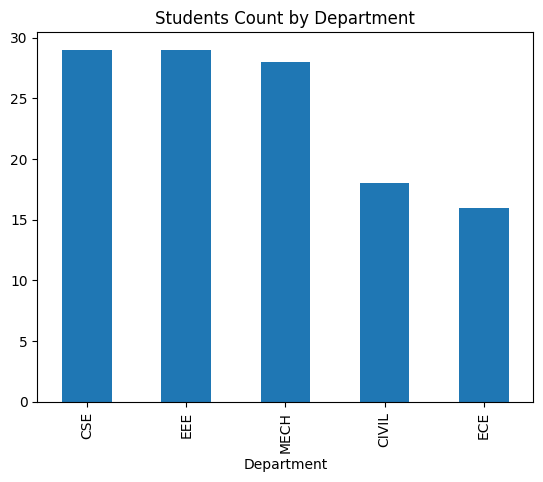

In [24]:
!pip install matplotlib
import matplotlib.pyplot as plt
df["Department"].value_counts().plot(kind="bar", title="Students Count by Department")
plt.show()



In [39]:
df.to_csv("student_file.csv", index=False)


In [40]:
#Numpy
n2 = np.random.randint(1,101, size = (10,5))
n2

array([[15, 74, 73, 52, 57],
       [ 7, 69, 69, 83, 16],
       [65, 54, 21, 37, 77],
       [82, 79, 77, 25,  7],
       [46, 36, 82, 44, 15],
       [55, 25, 42,  5, 74],
       [87, 41, 42,  3, 46],
       [64, 95, 63, 66, 18],
       [ 3, 66, 40, 25,  3],
       [38, 60, 15, 16, 69]], dtype=int32)

In [41]:
n2 = np.where(n2 < 50, 0, 1)
n2


array([[0, 1, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [1, 1, 0, 0, 1],
       [1, 1, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 1, 1, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1]])

In [47]:
row_mean = n2.mean(axis=1)
col_mean = n2.mean(axis=0)

row_std = n2.std(axis=1)
col_std = n2.std(axis=0)

row_var = n2.var(axis=1)
col_var = n2.var(axis=0)

row_mean, col_mean,
row_std, col_std,
row_var, col_var


(array([0.16, 0.24, 0.24, 0.24, 0.16, 0.24, 0.16, 0.16, 0.16, 0.24]),
 array([0.25, 0.21, 0.25, 0.21, 0.24]))

In [48]:
A = np.random.randint(1, 10, (3,3))
B = np.random.randint(1, 10, (3,3))

C = A @ B     # matrix multiplication
A, B, C


(array([[4, 8, 2],
        [9, 2, 7],
        [2, 3, 7]], dtype=int32),
 array([[2, 2, 9],
        [8, 5, 2],
        [9, 6, 7]], dtype=int32),
 array([[ 90,  60,  66],
        [ 97,  70, 134],
        [ 91,  61,  73]], dtype=int32))

In [50]:
matrix = np.random.randint(1, 10, (3,3))
eig_vals, eig_vecs = np.linalg.eig(matrix)
eig_vals, eig_vecs



(array([18.35723767, -0.12184534, -2.23539233]),
 array([[-0.50069947, -0.67332904,  0.1925535 ],
        [-0.67985013,  0.72378378, -0.65963528],
        [-0.53582071,  0.15088087,  0.72650151]]))

In [51]:
x = np.random.random(100)
x_norm = (x - x.min()) / (x.max() - x.min())
x_norm


array([0.71867747, 0.87148992, 0.2459442 , 0.99947003, 0.28626131,
       0.46945412, 0.88692997, 1.        , 0.18300054, 0.67840896,
       0.24320984, 0.48270125, 0.30799034, 0.49346475, 0.61573413,
       0.64801561, 0.85341933, 0.24475201, 0.05092764, 0.93928803,
       0.42197269, 0.71350677, 0.96002354, 0.35137415, 0.14797408,
       0.21709243, 0.5115718 , 0.96459798, 0.68255708, 0.61566554,
       0.        , 0.38916327, 0.06293431, 0.2367844 , 0.74530877,
       0.67772008, 0.08573426, 0.07301707, 0.30029502, 0.39822688,
       0.60932712, 0.97175126, 0.43021202, 0.79274633, 0.36276955,
       0.11959947, 0.36387864, 0.52912007, 0.07028384, 0.36130466,
       0.81392053, 0.32529802, 0.9218967 , 0.7041376 , 0.5447109 ,
       0.78696846, 0.43717504, 0.53512777, 0.53443422, 0.06794338,
       0.57364439, 0.93727952, 0.88291279, 0.38579136, 0.50737543,
       0.71383325, 0.97112351, 0.82769196, 0.41972482, 0.05711266,
       0.80010024, 0.5318578 , 0.21936654, 0.45043568, 0.83688

In [52]:
a = np.arange(1,6)
b = np.arange(6,11)

v_stack = np.vstack((a, b))
h_stack = np.hstack((a, b))

v_stack, h_stack


(array([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

In [53]:
arr5 = np.arange(1,26).reshape(5,5)

diag = np.diag(arr5)
upper = np.triu(arr5)
lower = np.tril(arr5)

diag, upper, lower


(array([ 1,  7, 13, 19, 25]),
 array([[ 1,  2,  3,  4,  5],
        [ 0,  7,  8,  9, 10],
        [ 0,  0, 13, 14, 15],
        [ 0,  0,  0, 19, 20],
        [ 0,  0,  0,  0, 25]]),
 array([[ 1,  0,  0,  0,  0],
        [ 6,  7,  0,  0,  0],
        [11, 12, 13,  0,  0],
        [16, 17, 18, 19,  0],
        [21, 22, 23, 24, 25]]))

In [55]:
m = np.random.randint(1, 10, (4,4))

d = np.linalg.det(m)
i = np.linalg.inv(m)

d, i


(np.float64(1735.9999999999993),
 array([[-0.24423963, -0.03974654,  0.23790323,  0.04550691],
        [-0.14285714,  0.16071429,  0.125     , -0.05357143],
        [ 0.26728111, -0.11923963, -0.28629032,  0.13652074],
        [ 0.23041475,  0.03513825, -0.10887097, -0.0547235 ]]))

In [56]:
x = np.array([1,2,3,4])
y = np.array([2,2,3,1])

equal = x == y
greater = x > y
less = x < y

equal, greater, less


(array([False,  True,  True, False]),
 array([False, False, False,  True]),
 array([ True, False, False, False]))

In [57]:
data = np.random.randn(1000)

p25 = np.percentile(data, 25)
p50 = np.percentile(data, 50)
p75 = np.percentile(data, 75)

p25, p50, p75


(np.float64(-0.6804642094185829),
 np.float64(-0.05500958054925449),
 np.float64(0.638822332444636))

In [58]:
arr = np.arange(24)

shape1 = arr.reshape(6,4)
shape2 = arr.reshape(4,6)
shape3 = arr.reshape(2,12)

shape1, shape2, shape3


(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]),
 array([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]),
 array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]]))

In [59]:
a = np.arange(5).reshape(5,1)
b = np.arange(5).reshape(1,5)

result = a + b
result


array([[0, 1, 2, 3, 4],
       [1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6],
       [3, 4, 5, 6, 7],
       [4, 5, 6, 7, 8]])

In [60]:
arr = np.random.randint(1,100,50)

threshold = arr.mean() + arr.std()
mask = arr > threshold

filtered_values = arr[mask]
filtered_values


array([97, 92, 92, 89, 91, 82, 88, 92, 84, 91, 95], dtype=int32)